# SVM KERNEL PRACTICAL EXPLANATION

In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10 ** 2 - x ** 2)
y=np.hstack([y,-y])
x=np.hstack([x, -x])

In [55]:
y

array([ 8.66025404,  8.71779204,  8.77378994,  8.82827705,  8.88128118,
        8.93282873,  8.98294476,  9.03165312,  9.07897646,  9.12493632,
        9.16955321,  9.21284664,  9.25483518,  9.29553652,  9.3349675 ,
        9.37314414,  9.41008171,  9.44579475,  9.4802971 ,  9.51360192,
        9.54572176,  9.57666854,  9.60645359,  9.63508769,  9.66258107,
        9.68894344,  9.714184  ,  9.73831149,  9.76133416,  9.7832598 ,
        9.80409577,  9.82384901,  9.84252604,  9.86013297,  9.87667553,
        9.89215905,  9.90658851,  9.91996849,  9.93230325,  9.94359667,
        9.9538523 ,  9.96307334,  9.97126266,  9.9784228 ,  9.98455598,
        9.98966408,  9.99374868,  9.99681104,  9.99885209,  9.99987246,
        9.99987246,  9.99885209,  9.99681104,  9.99374868,  9.98966408,
        9.98455598,  9.9784228 ,  9.97126266,  9.96307334,  9.9538523 ,
        9.94359667,  9.93230325,  9.91996849,  9.90658851,  9.89215905,
        9.87667553,  9.86013297,  9.84252604,  9.82384901,  9.80

In [56]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5 ** 2 - x1 ** 2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

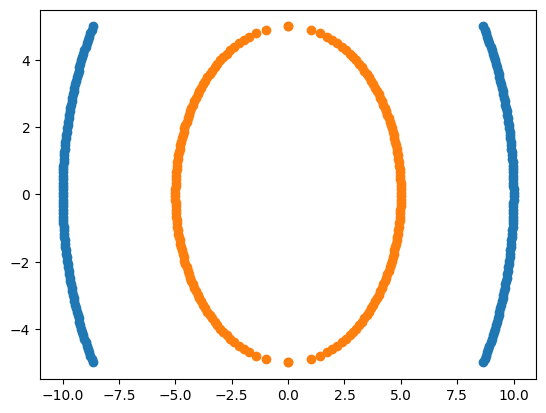

In [57]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [58]:
np.vstack([y,x]).T

array([[ 8.66025404, -5.        ],
       [ 8.71779204, -4.8989899 ],
       [ 8.77378994, -4.7979798 ],
       [ 8.82827705, -4.6969697 ],
       [ 8.88128118, -4.5959596 ],
       [ 8.93282873, -4.49494949],
       [ 8.98294476, -4.39393939],
       [ 9.03165312, -4.29292929],
       [ 9.07897646, -4.19191919],
       [ 9.12493632, -4.09090909],
       [ 9.16955321, -3.98989899],
       [ 9.21284664, -3.88888889],
       [ 9.25483518, -3.78787879],
       [ 9.29553652, -3.68686869],
       [ 9.3349675 , -3.58585859],
       [ 9.37314414, -3.48484848],
       [ 9.41008171, -3.38383838],
       [ 9.44579475, -3.28282828],
       [ 9.4802971 , -3.18181818],
       [ 9.51360192, -3.08080808],
       [ 9.54572176, -2.97979798],
       [ 9.57666854, -2.87878788],
       [ 9.60645359, -2.77777778],
       [ 9.63508769, -2.67676768],
       [ 9.66258107, -2.57575758],
       [ 9.68894344, -2.47474747],
       [ 9.714184  , -2.37373737],
       [ 9.73831149, -2.27272727],
       [ 9.76133416,

In [59]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y, x]).T, columns=['X1', 'X2'])
df1['Y'] = 0

df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1', 'X2'])
df2['Y'] = 1

df = pd.concat([df1, df2], ignore_index=True)

In [60]:
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [61]:
df.tail()

,X1,X2,Y
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1
399,-0.000000,-5.00000,1


In [62]:
X=df.iloc[:,:2]
y=df.Y

In [63]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [66]:
y_train

57     0
87     0
357    1
355    1
238    1
      ..
369    1
320    1
15     0
125    0
265    1
Name: Y, Length: 300, dtype: int64

# Polynomial Kernel

In [67]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square, X2_square,X1*X2
df['X1_Square']= df['X1'] ** 2
df['X2_Square']= df['X2'] ** 2
df['X1*X2']=(df['X1']*df['X2'])
df. head ()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [68]:
df.columns


Index(['X1', 'X2', 'Y', 'X1_Square', 'X2_Square', 'X1*X2'], dtype='object')

In [69]:
x=df[['X1', 'X2', 'Y', 'X1_Square', 'X2_Square', 'X1*X2']]
y=df['Y']

In [70]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [73]:
X_train.head()

,X1,X2
57,9.971263,0.757576
87,9.254835,3.787879
357,-4.942275,-0.757576
355,-4.969040,-0.555556
238,4.863193,-1.161616


In [77]:
import plotly.express as px
fig=px.scatter_3d(df, x='X1',y='X2', z='X1*X2', color='Y')
fig.show()

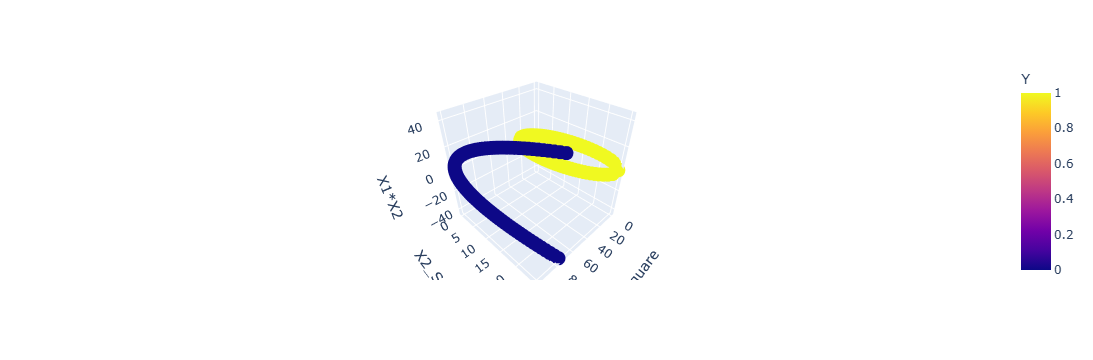

In [78]:
import plotly.express as px
fig=px.scatter_3d(df, x='X1_Square',y='X2_Square', z='X1*X2', color='Y')
fig.show()